In [1]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../../../")
from config.label_matchers import matchers

### Load the data:

In [2]:
df = pd.read_csv("./train-sample.csv")

In [3]:
print("Number of instances:", df.shape[0])

Number of instances: 140272


In [4]:
df.sample(5)

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
93903,8614138,12/23/2011 09:15:30,1113088,12/23/2011 08:48:57,1,0,Display Data in a Jtable upon Row Selection in...,I'am working on a project which has-\r\n\r\n**...,java,mysql,database,jtable,NaN,12/24/2011 16:45:54,not a real question
3401,10123607,04/12/2012 12:30:21,1329079,04/12/2012 12:23:19,1,0,"mysql,sql query.issue on selecting values",I have 2 tables.first one is user table and ot...,mysql,sql,NaN,NaN,NaN,NaN,open
113676,4176240,11/14/2010 04:54:49,507171,11/14/2010 04:54:49,1,0,How can i move image in opencv,"I mearged image with a video,i want to move im...",c++,opencv,NaN,NaN,NaN,01/17/2011 03:13:00,not a real question
5464,11605687,07/23/2012 02:16:08,1544731,07/23/2012 01:39:55,1,0,"minimum impact ""like"" request on Sybase ASE 12...",I would like to minimize the performace impact...,sql,query,optimization,locking,sybase,NaN,open
85589,8851335,01/13/2012 13:29:44,767387,05/24/2011 08:40:30,18,1,How to compress video using AVFoundation in iOS,Is there are any compression technique in iPho...,iphone,cocoa,ipad,avfoundation,NaN,06/04/2012 01:59:32,not a real question


In [5]:
df.columns = [c.lower() for c in df.columns]

df.rename(columns={"postid": "id", "bodymarkdown": "body", "openstatus": "label"}, inplace=True)

In [6]:
matcher = {v: k for (k, v) in matchers["closed_question"].items()}
df["label"] = df["label"].replace(matcher).astype(int)

C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_20812\926522606.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace(matcher).astype(int)


### Clean the data:

In [7]:
print("Number of missing titles:", df["title"].isnull().sum())
print("Number of missing bodies:", df["body"].isnull().sum())

Number of missing titles: 0
Number of missing bodies: 0


In [8]:
print("Number of missing labels:", df["label"].isnull().sum())
print("Number of missing labels:", df["label"].isnull().sum())

Number of missing labels: 0
Number of missing labels: 0


In [9]:
print(f"Number of duplicated texts: {df[["title", "body"]].duplicated().sum()} ({df[["title", "body"]].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts: 0 (0.00%)


### Analyze distributions:

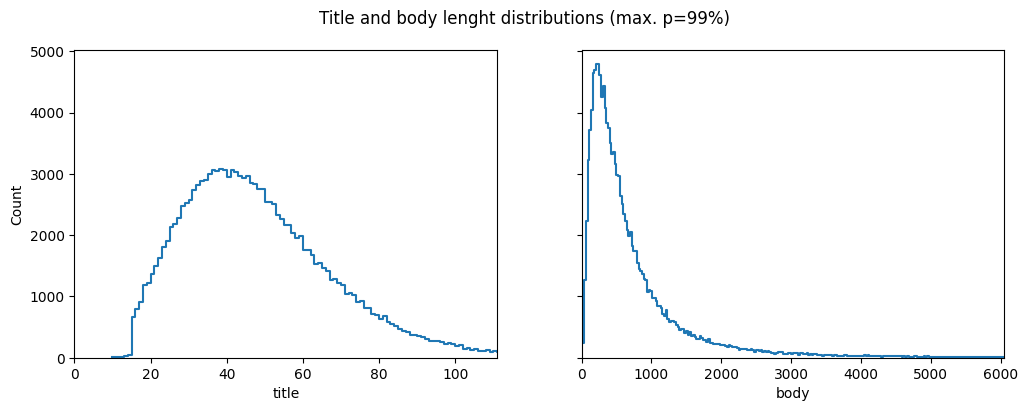

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
sns.histplot(df["title"].str.len(), element="step", fill=False, ax=axes[0])
axes[0].set_xlim([
    0,
    df["title"].str.len().quantile(.99)
])
sns.histplot(df["body"].str.len(), element="step", fill=False, ax=axes[1])
axes[1].set_xlim([
    0,
    df["body"].str.len().quantile(.99)
])
plt.suptitle("Title and body lenght distributions (max. p=99%)")
plt.show()

In [11]:
df["label"].value_counts(dropna=False, normalize=True).round(2)

label
0    0.50
1    0.22
2    0.12
3    0.11
4    0.04
Name: proportion, dtype: float64

### Prepare and persist datasets:

In [12]:
def concat(x):
    text = ""
    if x["title"] != "":
        text = x["title"]
    if x["body"] != "":
        if text != "":
            text += ".\n"
        text += x["body"]
    return text

df["text"] = df.apply(concat, axis=1)

In [13]:
print(f"Number of duplicated texts in the entire dataset: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts in the entire dataset: 0 (0.00%)


In [14]:
df[["id", "text", "label"]].to_parquet("./closed_question.parquet", index=False)

In [15]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 140272
